In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import h5py

SAVE_PLOTS = False

# Setup Parameters

Hamamatsu S13360-6025 SiPM

Voltage: $55.5 V$, Current: $
\approx 0.06 \mu A$

Trigger height: $2.32mV$, div $20mV$/$10 \mu s$


In [66]:
def get_default_filename():
    # get the newest file of the kind: analysis\data\sipm_spectroscopy\vp2ps_20250316-171204.csv
    import os
    import glob
    import re
    path = r'data\sipm_spectroscopy'
    files = glob.glob(path + '\*.csv')
    files.sort(key=os.path.getmtime)
    return files[-1]


vp2p_path = get_default_filename()
# vp2p_path = r'data\sipm_spectroscopy\vp2ps_20250317-120503_co60_1h.csv'
df = pd.read_csv(vp2p_path)
df.head(1)

,Unnamed: 0,t,V
0,0,1.742220e+09,0.0268


In [67]:

df['mV'] = df['V']*1000
mV_low_cut = 10
mV_high_cut = 50
df = df.loc[(df['mV'] > mV_low_cut) & (df['mV'] < mV_high_cut)].dropna()

df['t'] = [datetime.fromtimestamp(t) for t in df['t']]
df['t'] = pd.to_datetime(df['t'])
df = df.sort_values(by='t')

In [68]:
def print_stats():
    time_diff = (df['t'].iloc[-1] - df['t'].iloc[0]).seconds / 60
    avg_data_points_per_minute = df.shape[0] / time_diff

    print(f'Number of data points: {df.shape[0]}')
    print(f'Start time: {df["t"].iloc[0]}')
    print(f'End time: {df["t"].iloc[-1]}')
    print(f'Average number of data points per minute: {avg_data_points_per_minute:.2f}')
    print(f'Average number of data points per hour: {avg_data_points_per_minute * 60:.2f}')
    print(f'Total time of measurement: {time_diff // 60:.0f} hours and {time_diff % 60:.0f} minutes')
print_stats()

Number of data points: 6592
Start time: 2025-03-17 15:02:21.975551
End time: 2025-03-17 16:05:35.830330
Average number of data points per minute: 104.28
Average number of data points per hour: 6256.58
Total time of measurement: 1 hours and 3 minutes


Number of bins: 68
[10.         10.60588235 11.21176471 11.81764706 12.42352941 13.02941176
 13.63529412 14.24117647 14.84705882 15.45294118 16.05882353 16.66470588
 17.27058824 17.87647059 18.48235294 19.08823529 19.69411765 20.3
 20.90588235 21.51176471 22.11764706 22.72352941 23.32941176 23.93529412
 24.54117647 25.14705882 25.75294118 26.35882353 26.96470588 27.57058824
 28.17647059 28.78235294 29.38823529 29.99411765 30.6        31.20588235
 31.81176471 32.41764706 33.02352941 33.62941176 34.23529412 34.84117647
 35.44705882 36.05294118 36.65882353 37.26470588 37.87058824 38.47647059
 39.08235294 39.68823529 40.29411765 40.9        41.50588235 42.11176471
 42.71764706 43.32352941 43.92941176 44.53529412 45.14117647 45.74705882
 46.35294118 46.95882353 47.56470588 48.17058824 48.77647059 49.38235294
 49.98823529 50.59411765 51.2       ]


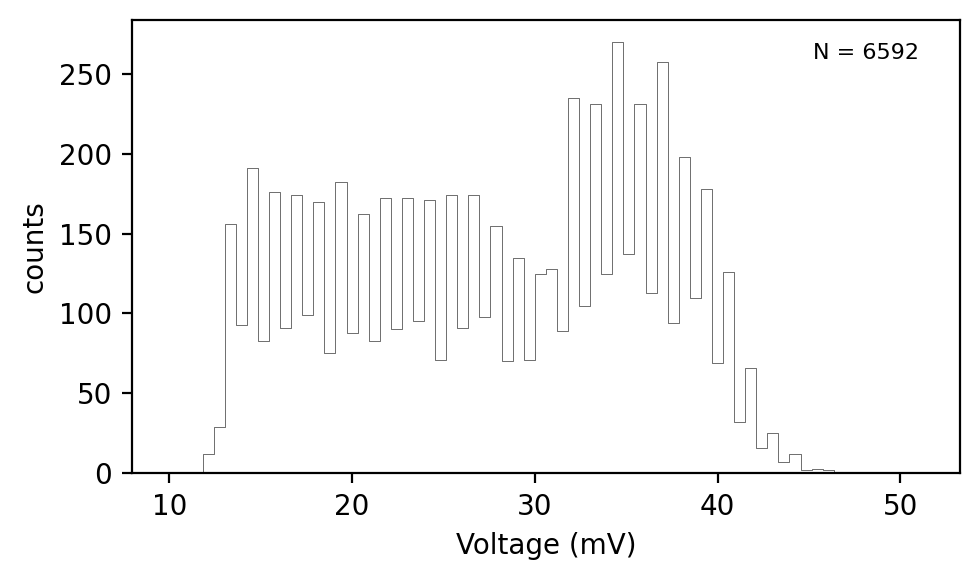

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=200)

step = 0.6
hist_min = mV_low_cut
hist_max = mV_high_cut
bins = np.arange(hist_min, hist_max + step, step)

print(f'Number of bins: {bins.length()}')
count, bins, _ = ax.hist(df['mV'], bins=n_bins, color='black', histtype='step', linewidth=0.2, range=(hist_min, hist_max))
print(bins)

# rescale the x axis by 1000 to convert from V to mV
# ax.set_xticks(ax.get_xticks()*1000)
ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()


# display the number of entries in the upper right corner of the plot
n_entries = df.shape[0]
ax.text(0.95, 0.95, f'N = {n_entries}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=8)

ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()
if SAVE_PLOTS:
    save_dir = f'plots/sipm_spectroscopy/preliminary/threshhold_4pt4mV'
    ax.set_yscale('log')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins_log.png', dpi=200)
    ax.set_yscale('linear')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins.png', dpi=200)

plt.show()